prueba github

modificación dos

In [4]:
datosr= "Datos\0806_mrr2c.nc_1.nc"

In [1]:
import IMProToo

ModuleNotFoundError: No module named 'IMProToo'

In [1]:
import IMProToo
import xarray as xr
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import proplot as pplt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta   
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from matplotlib.patches import Rectangle 

ModuleNotFoundError: No module named 'IMProToo'

In [2]:
#cargamos la base
ds = xr.open_dataset('C:/Users/Kanty/Documents/mrr2c/2024_0806_mrr2c_1.nc') # version window
#ds = xr.open_dataset('/home/kanty/Documentos/mrr2c/2024_0806_mrr2c_1.nc') #version linux


In [3]:
# Uso de colores hexadecimal personificados 
paleta0 = ['#ccd8ff','#3366ff','#9fdf9f','#00b300','#ffff00','#ffcc30','#e62e00','#ff6600','#fff0e5','#c03fc0','#602060']
paleta1 = ['#ffe5d9','#ffb3b3','#ffcc99','#ffffcc','#ccffcc','#b3e0ff','#b3b3ff','#e5ccff','#ffcce5','#ffd9b3','#ffe5b3']
paleta2 = ['#390099','#6C0079','#9E0059','#CF0057','#FF0054','#FF2A2A','#FF5400','#FF8900','#FFBD00','#FFC317','#FFC82C']
paleta3 = ['#000814','#001329','#001D3D','#002952','#003566','#40594D','#807C33','#A08E27','#C0A01A','#FFC300','#FFD60A']

def add_no_data(ax,times,xlim):
    cs = ax.contourf([times[0],times[-1]], [0,600], np.ones((2,2)), 
                    colors='none', edgecolor='red', hatches=['////'], zorder=0)
    for i, collection in enumerate(cs.collections):
        collection.set_edgecolor('gray3')
    middleIndex = int((len(times) - 1)/2)
    ax.text(xlim[0], 300, 'Sin Datos', 
                color='gray8',
                ha='left',va='center',
                zorder=1,
                )

def plot_mrr2(xlim, times, heights, Ze, Vf=None, hora_local=False, ax=None,
              ytickloc='both', colorhex = paleta0):                   # aca cargar paleta de colores personalizada a usar
    cmap4 = []
    stops = [0,1./10,2./10,3./10,4./10,5./10,6./10,7./10,8./10,9./10,1]
    for value, color in zip(stops,colorhex):
            cmap4.append((value,color))
    dbzmap = colors.LinearSegmentedColormap.from_list("custom",cmap4)
    dbzmap.set_bad('0.9',1)
    bounds = np.arange(-5,50,1)
    norm = colors.BoundaryNorm(bounds, dbzmap.N)

    if hora_local:
      xlabel = r'Hora Local $\rightarrow$'
    else:
      xlabel = r'Hora UTC $\rightarrow$'

    if heights[-1]< 5000:
      ylim = [0, 3600]
    else:
      ylim = [0, 8000]

    total_seconds = (xlim[1]-xlim[0]).total_seconds()
    
    if total_seconds <= 14400:
      xlocator=('hour',range(0,24,1))
      xminorlocator=('minute',30)
    elif (total_seconds>14400) and (total_seconds<=82800.0):
      xlocator=('hour',range(0,24,3))
      xminorlocator=('hour',range(0,24,1))
    else:      
      xlocator=('hour',range(0,24,6))
      xminorlocator=('hour',range(0,24,2))


    if Vf is None:

      if ax is None:
        fig, ax = pplt.subplots(refwidth=5, refaspect=3)

      mZe = ax.pcolormesh(times, heights, Ze,  
                        norm=norm, cmap=dbzmap, 
                        shading='auto', # permite que tickmark esté en centro de celda
                      #   extend='both'
                        )		

      ax.format(	ultitle='Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc=ytickloc,
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel,
                  )
      ax.colorbar(mZe, loc='r', label='[dBZ]', length=0.7,)
        
      if xlim != '':
          ax.format(xlim=xlim)    
      
    else:
      
      fig, ax = pplt.subplots(nrows=2, refwidth=5, refaspect=3)

      mZe = ax[0].pcolormesh(times, heights, Ze,  
                        norm=norm, cmap=dbzmap, 
                        shading='auto', # permite que tickmark esté en centro de celda
                       #extend='both'
                        )		
      add_no_data(ax[0], times, xlim)   
      
      mVf = ax[1].pcolormesh(times, heights, Vf, 
                            vmin=-3,vmax=10,        # Aca cambiar a la paleta de colores predeterminadas a usar 
                             #cmap='Spectral',      # Colores paleta espectro visual
                             #cmap='RdYlGn',        # Colores paleta rojo-amarillo-verde
                             #cmap='RdYlBu',        # Colores paleta rojo-amarillo-azul
                             #cmap='RdGy',          # Colores paleta rojo-gris
                             cmap='RdBu',          # Colores paleta rojo-azul
                             #cmap='PuOr',           # Colores paleta purpura-naranja
                             #cmap='PRGn',          # Colores paleta purpura(rojiza)-verde(amarillento)
                             #cmap='PiYG',          # Colores paleta rosa-amarillo-verde
                             #cmap='BrBG',          # Colores paleta marron-azul(verdoso)
                            shading='auto',
                           #extend='both'
                            )	
      add_no_data(ax[1], times, xlim)

      ax[0].format(	ultitle='Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel,
                  )
      ax[0].colorbar(mZe, loc='r', label='[dBZ]', length=0.4,)
      
      ax[1].format(	ultitle='Velocidad de caída',
                      xrotation=False,
                      #   xformatter='%b-%d\n%H:%M',
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
          )
      ax[1].colorbar(mVf, loc='r', label='[m/s]', length=0.4, 
                    extend='both')
  
      if xlim != '':
          ax[0].format(xlim=xlim)
          ax[1].format(xlim=xlim)
    
    fig.show()	

C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\1887986037.py:142: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


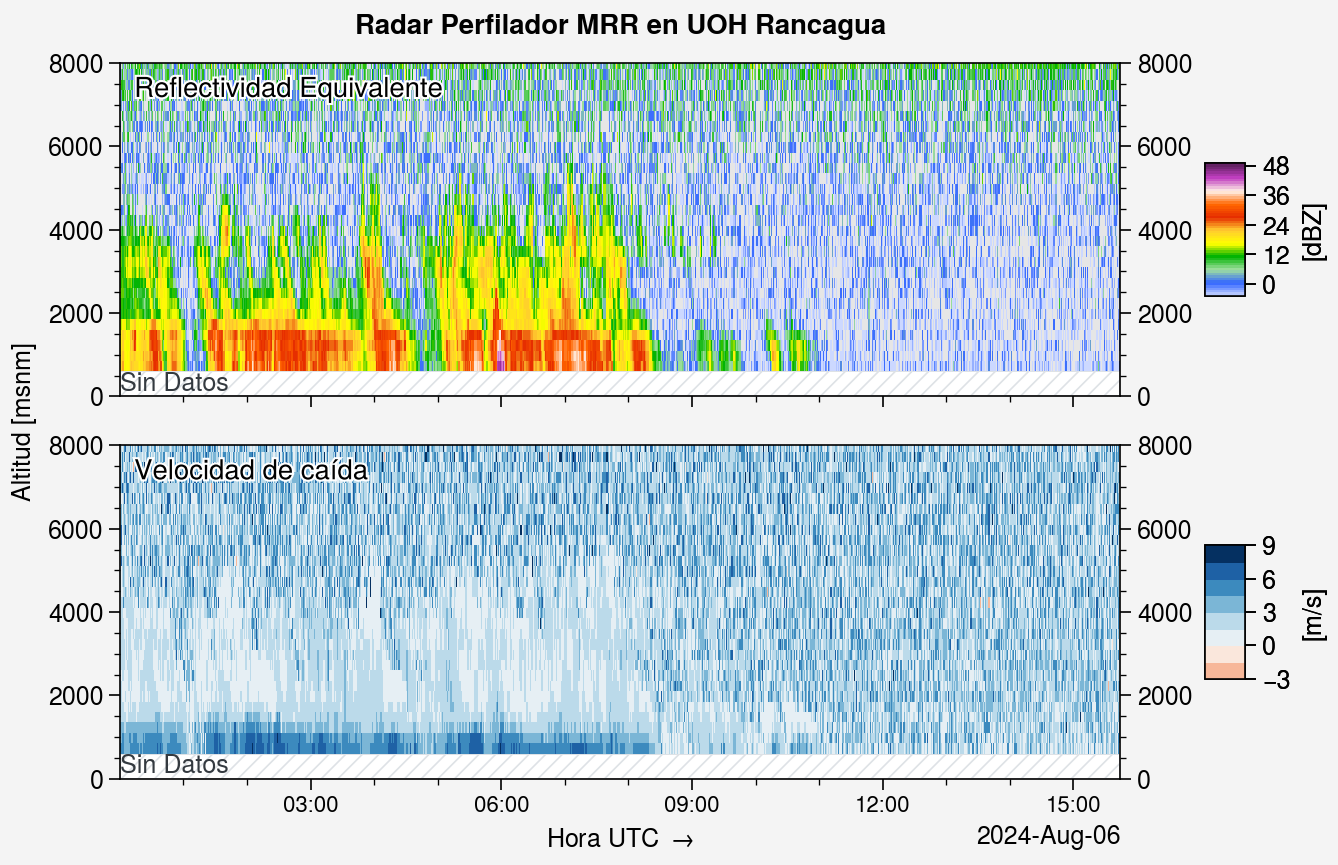

In [4]:
new_time = pd.to_datetime(ds.time.values)
xlim = [new_time[0], new_time[-1]]
heights = ds.height[0,:]+500
Ze = ds['attenuated_radar_reflectivity'].T
Vf = ds['fall_velocity'].T
# llamar a la funcion para plotear
plot_mrr2(xlim,pd.to_datetime(ds.time.values) , heights, Ze, Vf, hora_local=False)


## Filtro para ruido

C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\1887986037.py:142: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


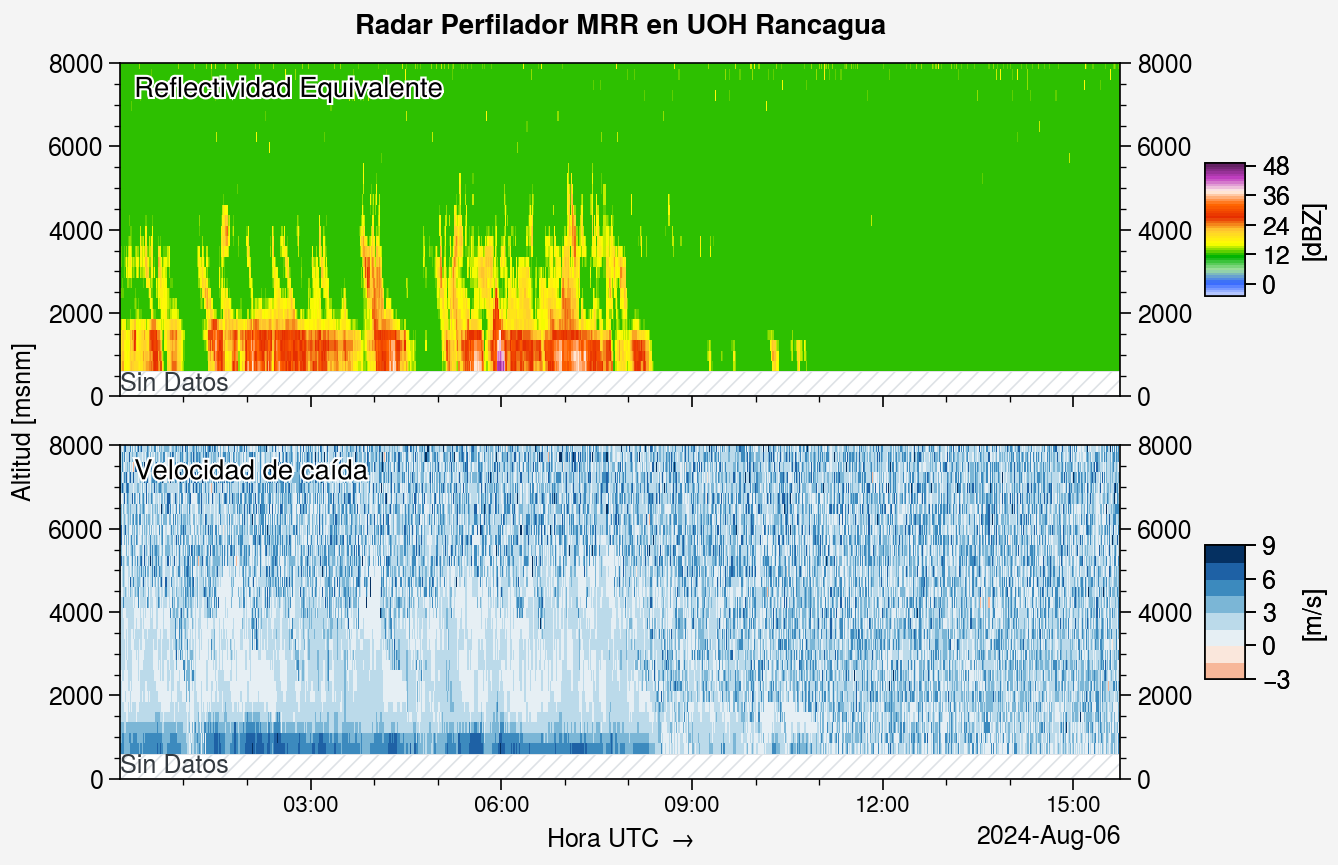

In [5]:
minimo= 12     # Valor minimo a filtrar
Ze_filtered = Ze.where(Ze >= minimo, minimo)
plot_mrr2(xlim,pd.to_datetime(ds.time.values) , heights, Ze_filtered, Vf, hora_local=False)


## Funcion gradiente

In [6]:
def plot_mrr3(xlim, times, heights, Ze, Vf=None, hora_local=False, ax=None,
              ytickloc='both', colorhex = paleta0):                   # aca cargar paleta de colores personalizada a usar
    cmap4 = []
    stops = [0,1./10,2./10,3./10,4./10,5./10,6./10,7./10,8./10,9./10,1]
    for value, color in zip(stops,colorhex):
            cmap4.append((value,color))
    dbzmap = colors.LinearSegmentedColormap.from_list("custom",cmap4)
    dbzmap.set_bad('0.9',1)
    bounds = np.arange(-5,50,1)
    norm = colors.BoundaryNorm(bounds, dbzmap.N)

    if hora_local:
      xlabel = r'Hora Local $\rightarrow$'
    else:
      xlabel = r'Hora UTC $\rightarrow$'

    if heights[-1]< 5000:
      ylim = [0, 3600]
    else:
      ylim = [0, 8000]

    total_seconds = (xlim[1]-xlim[0]).total_seconds()
    
    if total_seconds <= 14400:
      xlocator=('hour',range(0,24,1))
      xminorlocator=('minute',30)
    elif (total_seconds>14400) and (total_seconds<=82800.0):
      xlocator=('hour',range(0,24,3))
      xminorlocator=('hour',range(0,24,1))
    else:      
      xlocator=('hour',range(0,24,6))
      xminorlocator=('hour',range(0,24,2))


    if Vf is None:

      if ax is None:
        fig, ax = pplt.subplots(refwidth=5, refaspect=3)

      mZe = ax.pcolormesh(times, heights, Ze,  
                        norm=norm, cmap=dbzmap, 
                        shading='auto', # permite que tickmark esté en centro de celda
                      #   extend='both'
                        )		

      ax.format(	ultitle='Gradiente Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc=ytickloc,
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel,
                  )
      ax.colorbar(mZe, loc='r', label='[dBZ]', length=0.7,)
        
      if xlim != '':
          ax.format(xlim=xlim)    
      
    else:
      
      fig, ax = pplt.subplots(nrows=2, refwidth=5, refaspect=3)

      mZe = ax[0].pcolormesh(times, heights, Ze,  
                        norm=norm, cmap=dbzmap, 
                        shading='auto', # permite que tickmark esté en centro de celda
                       #extend='both'
                        )		
      add_no_data(ax[0], times, xlim)   
      
      mVf = ax[1].pcolormesh(times, heights, Vf, 
                            vmin=-3,vmax=10,        # Aca cambiar a la paleta de colores predeterminadas a usar 
                             #cmap='Spectral',      # Colores paleta espectro visual
                             #cmap='RdYlGn',        # Colores paleta rojo-amarillo-verde
                             #cmap='RdYlBu',        # Colores paleta rojo-amarillo-azul
                             #cmap='RdGy',          # Colores paleta rojo-gris
                             cmap='RdBu',          # Colores paleta rojo-azul
                             #cmap='PuOr',           # Colores paleta purpura-naranja
                             #cmap='PRGn',          # Colores paleta purpura(rojiza)-verde(amarillento)
                             #cmap='PiYG',          # Colores paleta rosa-amarillo-verde
                             #cmap='BrBG',          # Colores paleta marron-azul(verdoso)
                            shading='auto',
                           #extend='both'
                            )	
      add_no_data(ax[1], times, xlim)

      ax[0].format(	ultitle='Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel,
                  )
      ax[0].colorbar(mZe, loc='r', label='[dBZ]', length=0.4,)
      
      ax[1].format(	ultitle='Velocidad de caída',
                      xrotation=False,
                      #   xformatter='%b-%d\n%H:%M',
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
          )
      ax[1].colorbar(mVf, loc='r', label='[m/s]', length=0.4, 
                    extend='both')
  
      if xlim != '':
          ax[0].format(xlim=xlim)
          ax[1].format(xlim=xlim)
    
    fig.show()	

In [7]:
def calcular_gradiente(datos, marco):
    pesos = np.array([marco - i for i in range(marco)])  
    pesos = pesos / np.sum(pesos)                        
    niveles_restantes = datos.shape[0] - 1 - 2 * (marco - 1)
    gradiente_datos = np.zeros((niveles_restantes, datos.shape[1]))

    for i in range(marco, datos.shape[0] - marco):
        superior = np.sum([pesos[j] * datos[i + j, :] for j in range(marco)], axis=0)
        inferior = np.sum([pesos[j] * datos[i - j - 1, :] for j in range(marco)], axis=0)
        gradiente_datos[i - marco, :] = superior - inferior

    filas_superior = marco
    filas_inferior = marco - 1

    gradiente_datos_completo = np.pad(gradiente_datos, ((filas_superior, filas_inferior), (0, 0)), mode='constant', constant_values=0)

    return gradiente_datos_completo

C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\921990719.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


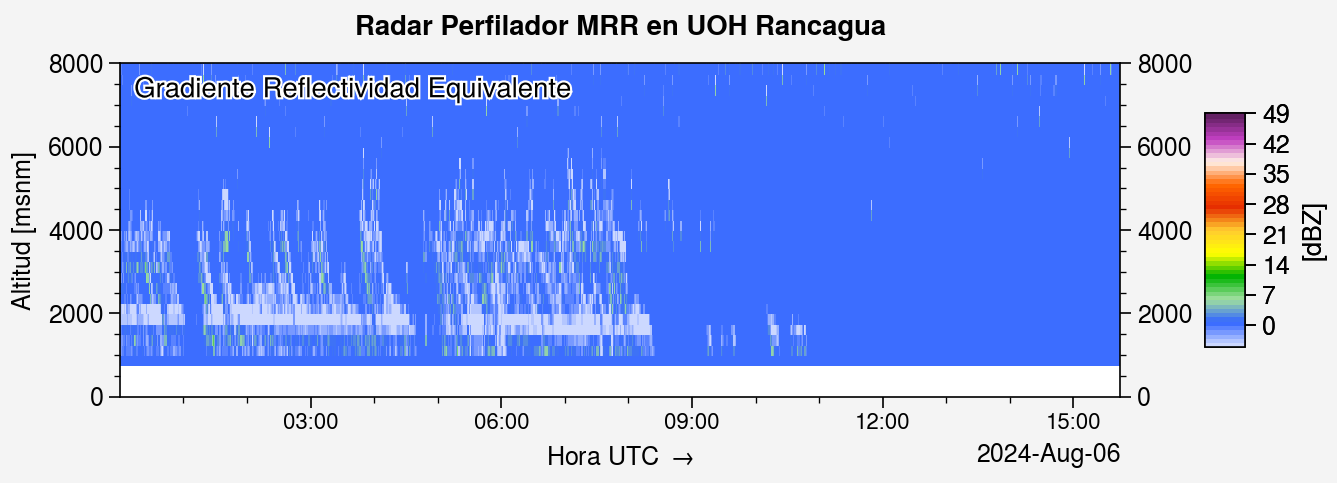

In [8]:
altura_inicial_desfase = 500 + (heights[1] - heights[0]) / 2   # Ajuste altura

heights_ajustado = ds.height[0, :] + altura_inicial_desfase

marco = 1 
gradiente_Ze = calcular_gradiente(Ze_filtered, marco)
plot_mrr3(xlim, new_time, heights_ajustado, gradiente_Ze, hora_local=False)

# Funcion detectar isoterma

In [9]:
def detectar_isoterma_cero(gradiente, altura_inicial):
    resultados = []
    altura_actual = altura_inicial

    for t in range(gradiente.shape[1]):                      
        idx_altura = int((np.abs(heights_ajustado - altura_actual)).argmin()) # Ajuste altura ingresada con valor correspondiente
        gradiente_minimo = gradiente[idx_altura, t]
        altura_minima = heights_ajustado[idx_altura].values  
        idx_superior = max(idx_altura - 1, 0)
        idx_inferior = min(idx_altura + 1, len(heights_ajustado) - 1)

        for i in range(idx_superior, idx_inferior + 1):     
            if gradiente[i, t] < gradiente_minimo:
                gradiente_minimo = gradiente[i, t]
                altura_minima = heights_ajustado[i].values  
        
        altura_actual = altura_minima                      
        resultados.append({
            "iter": t,
            "altura_minima": altura_actual,
            "gradiente_minimo": gradiente_minimo
        })

    return resultados

C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\921990719.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


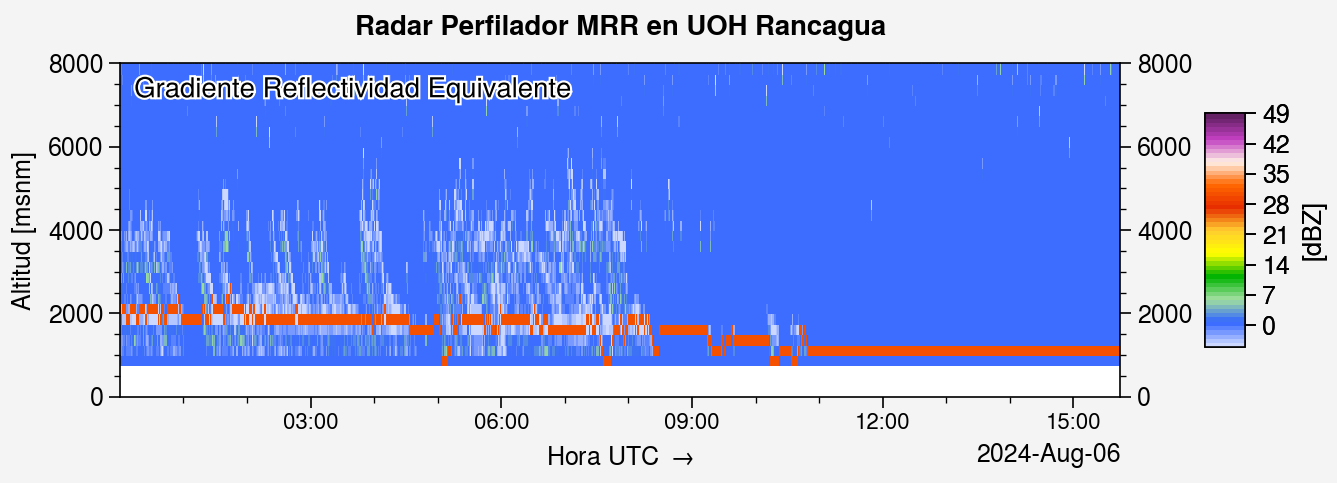

In [10]:
altura_inicial = 2000 
resultados_isoterma = detectar_isoterma_cero(gradiente_Ze, altura_inicial)
gradiente_modificado = np.copy(gradiente_Ze)
IndicesIsoterma = []
for resultado in resultados_isoterma:
    t = resultado["iter"]
    altura_minima = resultado["altura_minima"]
    idx_altura = int((np.abs(heights_ajustado - altura_minima)).argmin())
    IndicesIsoterma.append(idx_altura)
    gradiente_modificado[idx_altura, t] = 30

plot_mrr3(xlim, new_time, heights_ajustado, gradiente_modificado, hora_local=False)  
FactorConversion = (heights[-1].values-500)/ len(heights)
AlturasIsoterma = np.array(IndicesIsoterma) * FactorConversion 

## Funcion Filtro Kalman

In [11]:
def filtro_kalman(alturas, delta_t, Q_ruido_proceso_reflectividad, Q_ruido_proceso_gradiente, R_ruido_medicion, factor_ponderador):
    
    f = KalmanFilter(dim_x=2, dim_z=1)
    f.x = np.array([alturas[0], 0])         # Estado inicial
    f.F = np.array([[1, delta_t], [0, 1]])  # Modelo de transición
    f.H = np.array([[1, 0]])                # Matriz de observación 
    f.P *= 0.1                              # Matriz de covarianza inicial
    f.R = R_ruido_medicion                  # Ruido de medición
    f.Q = np.array([[Q_ruido_proceso_reflectividad, 0], [0, Q_ruido_proceso_gradiente]])  # Ruido del proceso

    varianza_global = np.var(alturas)
    desviacion_global = np.sqrt(varianza_global)

    alturas_filtradas = []
    valores_confiables = [alturas[0]]

    for z in alturas[1:]:
        f.predict()
        media = np.mean(valores_confiables[-10:])  # Últimos 10 valores confiables
        limite_varianza_inferior = media - factor_ponderador * desviacion_global
        limite_varianza_superior = media + factor_ponderador * desviacion_global
        if limite_varianza_inferior <= z <= limite_varianza_superior:
            f.update(z)                   # Actualizar con el valor confiable
            valores_confiables.append(z)  # Agregar a la lista de confiables
        alturas_filtradas.append(f.x[0].copy())

    return np.array(alturas_filtradas)

In [12]:
altura_inicial_desfase = 500 + (heights[1].values - heights[0].values) / 2
AlturasIsoterma_ajustadas = AlturasIsoterma + altura_inicial_desfase

# Parámetros del filtro Kalman
delta_t = 20                           # Intervalo de tiempo
Q_ruido_proceso_reflectividad = 1e-5   # Ruido del proceso para reflectividad
Q_ruido_proceso_gradiente = 1e-5       # Ruido del proceso para gradiente
R_ruido_medicion = 1                   # Ruido de medición
factor_ponderador = 0.65               # Ponderador para límites dinámicos(aca se modifica para ver la tolerancia del modelo)

alturas_filtradas = filtro_kalman(AlturasIsoterma_ajustadas, 
                                   delta_t, 
                                   Q_ruido_proceso_reflectividad, 
                                   Q_ruido_proceso_gradiente, 
                                   R_ruido_medicion, 
                                   factor_ponderador)

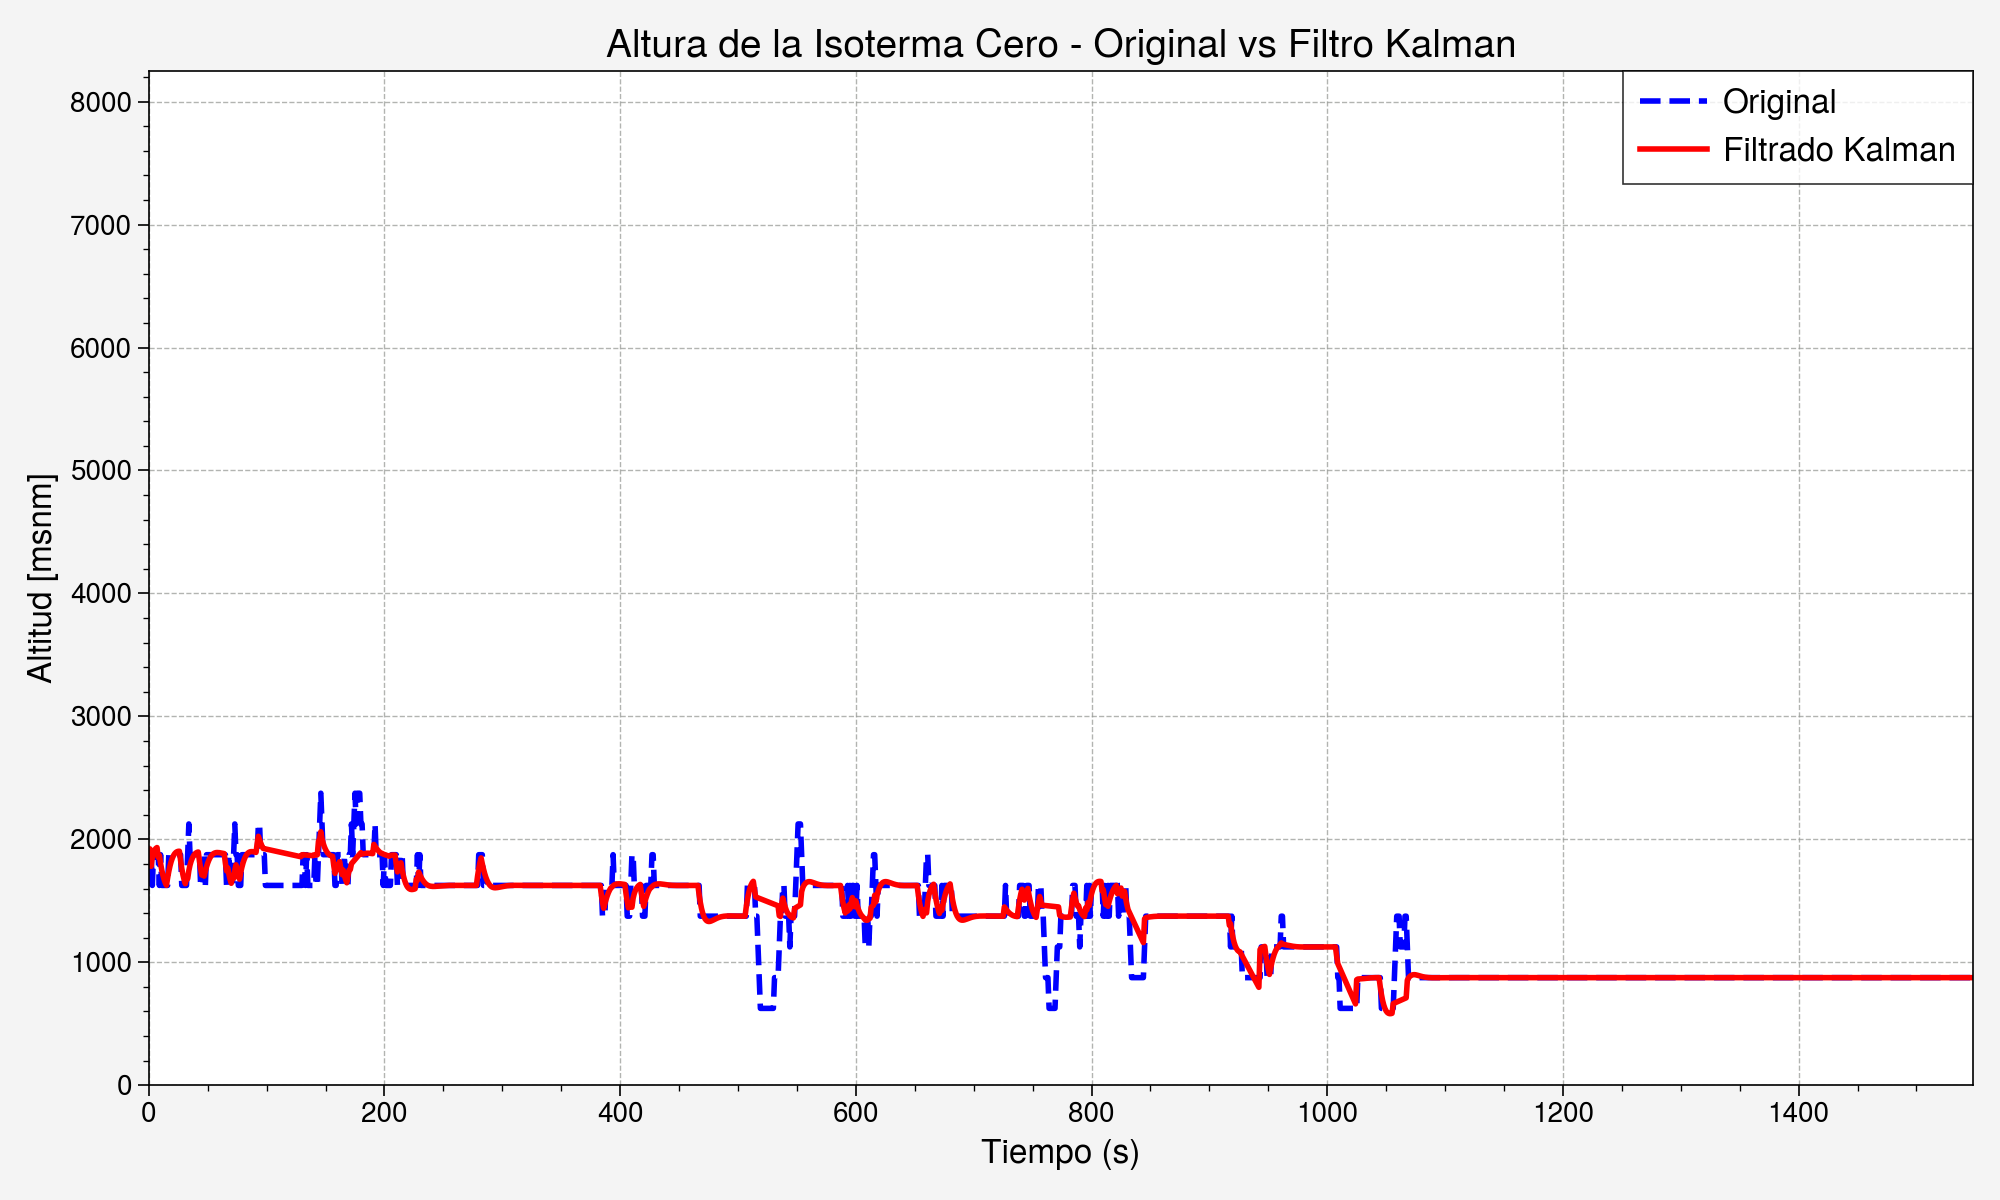

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))  
ax.plot(AlturasIsoterma_ajustadas, label="Original", linestyle='--', color='blue', linewidth=2)
ax.plot(alturas_filtradas, label="Filtrado Kalman", linestyle='-', color='red', linewidth=2)
ax.set_xlabel('Tiempo (s)', fontsize=12) 
ax.set_ylabel('Altitud [msnm]', fontsize=12)
ax.set_title('Altura de la Isoterma Cero - Original vs Filtro Kalman', fontsize=14)
ax.set_xlim([0, len(AlturasIsoterma)])  
ax.set_ylim([0, heights[-1].values])    
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(loc='upper right', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()  
plt.show()

In [14]:
def plot_mrr4(xlim, times, heights, Ze, Vf=None, isoterma=None, hora_local=False, ax=None,
              ytickloc='both', colorhex=paleta0):
    cmap4 = []
    stops = [0,1./10,2./10,3./10,4./10,5./10,6./10,7./10,8./10,9./10,1]
    for value, color in zip(stops, colorhex):
        cmap4.append((value, color))
    dbzmap = colors.LinearSegmentedColormap.from_list("custom", cmap4)
    dbzmap.set_bad('0.9', 1)
    bounds = np.arange(-5, 50, 1)
    norm = colors.BoundaryNorm(bounds, dbzmap.N)

    if hora_local:
        xlabel = r'Hora Local $\rightarrow$'
    else:
        xlabel = r'Hora UTC $\rightarrow$'

    # Configurar límites de altura
    if heights[-1] < 5000:
        ylim = [0, 3600]
    else:
        ylim = [0, 8000]

    total_seconds = (xlim[1] - xlim[0]).total_seconds()
    if total_seconds <= 14400:
        xlocator = ('hour', range(0, 24, 1))
        xminorlocator = ('minute', 30)
    elif (total_seconds > 14400) and (total_seconds <= 82800.0):
        xlocator = ('hour', range(0, 24, 3))
        xminorlocator = ('hour', range(0, 24, 1))
    else:
        xlocator = ('hour', range(0, 24, 6))
        xminorlocator = ('hour', range(0, 24, 2))

    if Vf is None:
        if ax is None:
            fig, ax = pplt.subplots(refwidth=5, refaspect=3)

        mZe = ax.pcolormesh(times, heights, Ze,  
                            norm=norm, cmap=dbzmap, 
                            shading='auto')

        if isoterma is not None:
            ax.plot(times, isoterma, color='black', linestyle='--', linewidth=1.5, label='Isoterma (Filtrada)')
            ax.legend()  # Mostrar leyenda

        ax.format(ultitle='Reflectividad Equivalente',
                  xrotation=False,
                  xformatter='concise',
                  xlocator=xlocator,
                  xminorlocator=xminorlocator,
                  ylim=ylim,
                  yticklabelloc=ytickloc,
                  ytickloc='both',
                  xticklabelsize=8,
                  suptitle='Radar Perfilador MRR en UOH Rancagua',
                  ylabel='Altitud [msnm]',
                  xlabel=xlabel)
        ax.colorbar(mZe, loc='r', label='[dBZ]', length=0.7,)

        if xlim != '':
            ax.format(xlim=xlim)

    else:
        fig, ax = pplt.subplots(nrows=2, refwidth=5, refaspect=3)

        mZe = ax[0].pcolormesh(times, heights, Ze,  
                               norm=norm, cmap=dbzmap, 
                               shading='auto')
        add_no_data(ax[0], times, xlim)

        mVf = ax[1].pcolormesh(times, heights, Vf, 
                               vmin=-3, vmax=10, cmap='RdBu', shading='auto')
        add_no_data(ax[1], times, xlim)

        if isoterma is not None:
            ax[0].plot(times, isoterma, color='black', linestyle='--', linewidth=1.5, label='Isoterma (Filtrada)')
            ax[0].legend()  # Mostrar leyenda

        ax[0].format(ultitle='Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel)
        ax[0].colorbar(mZe, loc='r', label='[dBZ]', length=0.4,)

        ax[1].format(ultitle='Velocidad de caída',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8)
        ax[1].colorbar(mVf, loc='r', label='[m/s]', length=0.4, extend='both')

        if xlim != '':
            ax[0].format(xlim=xlim)
            ax[1].format(xlim=xlim)

    fig.show()



C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\1412623908.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


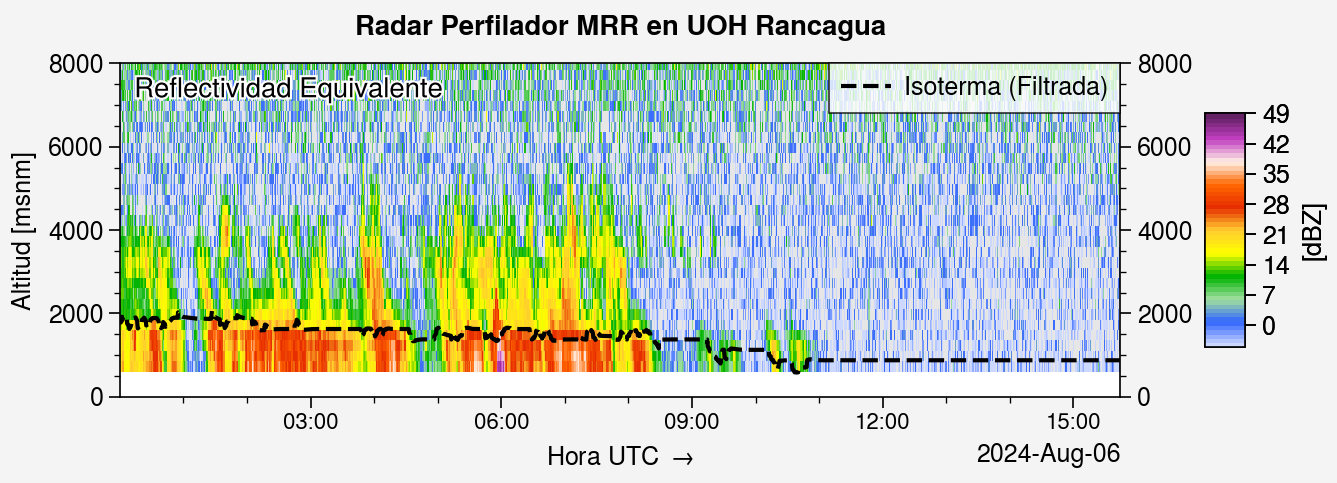

In [15]:
# Grafico solo de reflectividad
new_time = pd.to_datetime(ds.time.values)
xlim = [new_time[0], new_time[-1]]
heights = ds.height[0, :].values + 500  
Ze = ds['attenuated_radar_reflectivity'].T.values  

# Ajustar alturas_filtradas para que coincida con times
if len(alturas_filtradas) < len(new_time):
    alturas_filtradas = np.append([alturas_filtradas[0]], alturas_filtradas)
elif len(alturas_filtradas) > len(new_time):
    alturas_filtradas = alturas_filtradas[:len(new_time)]


plot_mrr4(
    xlim=xlim,
    times=new_time,
    heights=heights,
    Ze=Ze,
    isoterma=alturas_filtradas,  # Línea de isoterma filtrada
    hora_local=False
)

In [16]:
def plot_mrr4(xlim, times, heights, Ze, Vf=None, isoterma=None, hora_local=False, ax=None,
              ytickloc='both', colorhex=paleta0):
    cmap4 = []
    stops = [0, 1./10, 2./10, 3./10, 4./10, 5./10, 6./10, 7./10, 8./10, 9./10, 1]
    for value, color in zip(stops, colorhex):
        cmap4.append((value, color))
    dbzmap = colors.LinearSegmentedColormap.from_list("custom", cmap4)
    dbzmap.set_bad('0.9', 1)
    bounds = np.arange(-5, 50, 1)
    norm = colors.BoundaryNorm(bounds, dbzmap.N)
    
    if hora_local:
        xlabel = r'Hora Local $\rightarrow$'
    else:
        xlabel = r'Hora UTC $\rightarrow$'

    if heights[-1] < 5000:
        ylim = [0, 3600]
    else:
        ylim = [0, 8000]

    total_seconds = (xlim[1] - xlim[0]).total_seconds()
    if total_seconds <= 14400:
        xlocator = ('hour', range(0, 24, 1))
        xminorlocator = ('minute', 30)
    elif (total_seconds > 14400) and (total_seconds <= 82800.0):
        xlocator = ('hour', range(0, 24, 3))
        xminorlocator = ('hour', range(0, 24, 1))
    else:
        xlocator = ('hour', range(0, 24, 6))
        xminorlocator = ('hour', range(0, 24, 2))

    if Vf is not None:
        fig, ax = pplt.subplots(nrows=2, refwidth=5, refaspect=3)

        mZe = ax[0].pcolormesh(times, heights, Ze,
                               norm=norm, cmap=dbzmap,
                               shading='auto')
        add_no_data(ax[0], times, xlim)

        mVf = ax[1].pcolormesh(times, heights, Vf,
                               vmin=-3, vmax=10, cmap='RdBu', shading='auto')
        add_no_data(ax[1], times, xlim)

        # Agregar línea de la isoterma en ambos gráficos
        if isoterma is not None:
            ax[0].plot(times, isoterma, color='black', linestyle='--', linewidth=1.5, label='Isoterma Cero')
            ax[1].plot(times, isoterma, color='black', linestyle='--', linewidth=1.5, label='Isoterma Cero')
            ax[0].legend(loc='upper right', fontsize=10)  
            ax[1].legend(loc='upper right', fontsize=10)  
            

        ax[0].format(ultitle='Reflectividad Equivalente',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8,
                      suptitle='Radar Perfilador MRR en UOH Rancagua',
                      ylabel='Altitud [msnm]',
                      xlabel=xlabel)
        ax[0].colorbar(mZe, loc='r', label='[dBZ]', length=0.4,)

        ax[1].format(ultitle='Velocidad de caída',
                      xrotation=False,
                      xformatter='concise',
                      xlocator=xlocator,
                      xminorlocator=xminorlocator,
                      ylim=ylim,
                      yticklabelloc='both',
                      ytickloc='both',
                      xticklabelsize=8)
        ax[1].colorbar(mVf, loc='r', label='[m/s]', length=0.4, extend='both')

        if xlim != '':
            ax[0].format(xlim=xlim)
            ax[1].format(xlim=xlim)

    else:
        if ax is None:
            fig, ax = pplt.subplots(refwidth=5, refaspect=3)

        mZe = ax.pcolormesh(times, heights, Ze,
                            norm=norm, cmap=dbzmap,
                            shading='auto')

        ax.format(ultitle='Reflectividad Equivalente',
                  xrotation=False,
                  xformatter='concise',
                  xlocator=xlocator,
                  xminorlocator=xminorlocator,
                  ylim=ylim,
                  yticklabelloc=ytickloc,
                  ytickloc='both',
                  xticklabelsize=8,
                  suptitle='Radar Perfilador MRR en UOH Rancagua',
                  ylabel='Altitud [msnm]',
                  xlabel=xlabel)
        ax.colorbar(mZe, loc='r', label='[dBZ]', length=0.7,)

        if xlim != '':
            ax.format(xlim=xlim)

    fig.show()


C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\anaconda3\envs\myenv\lib\site-packages\proplot\axes\plot.py:1275: UserWarning: No contour levels were found within the data range.
  obj = getattr(super(), name)(*args, **kwargs)
C:\Users\Kanty\AppData\Local\Temp\ipykernel_1960\144222259.py:107: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


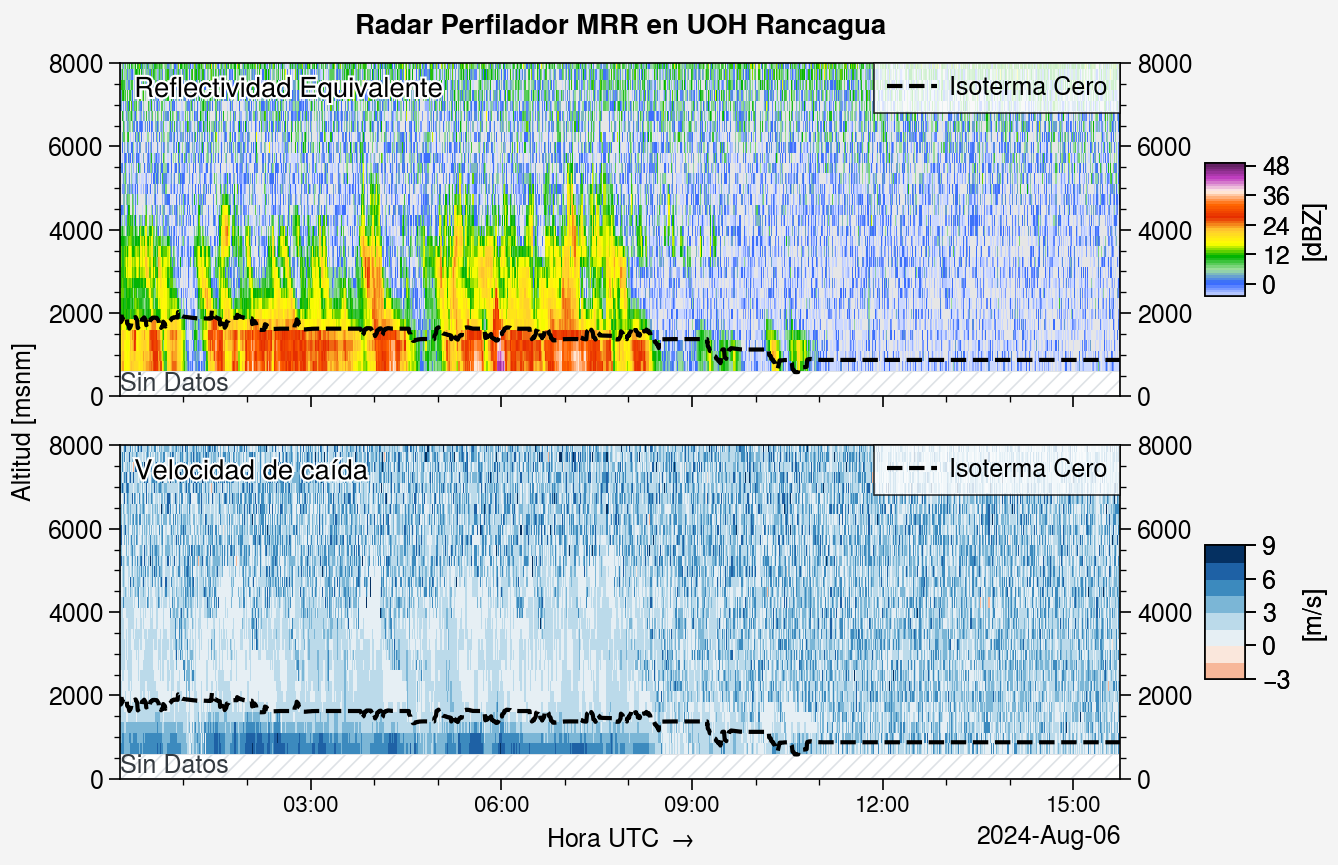

In [17]:
plot_mrr4(
    xlim=[new_time[0], new_time[-1]],                 # Límites de tiempo
    times=new_time,                                   # Eje temporal
    heights=ds.height[0, :].values + 500,             # Alturas ajustadas
    Ze=ds['attenuated_radar_reflectivity'].T.values,  # Reflectividad
    Vf=ds['fall_velocity'].T.values,                  # Velocidad de caída
    isoterma=alturas_filtradas,                       # Línea de isoterma filtrada
    hora_local=False
) 